<a href="https://colab.research.google.com/github/optimalMachine/EliteDataScienceCourse/blob/master/5_Workbook_The_Final_Arbiter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### COMPANION WORKBOOK

# The Final Arbiter

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. The Search for Empirical Truth

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/How the World Works/simulated_data.csv')
df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


In [24]:
def fit_and_plot_model (df,model):
  features = df.drop('y',axis=1)
  target = df.y

  model.fit(features,target)

  plt.scatter (df.x,df.y)
  plt.plot(df.x,model.predict(features),'k--')
  
  return model


In [25]:
def fit_and_plot_polynomial_model (df,model,max_polynomial=1):
  df_copy = df.copy()

  if max_polynomial == 1:
    model = fit_and_plot_model(df_copy,model)
  else:
    for power in range (2,max_polynomial+1):
      df_copy['x{}'.format(power)] = np.power(df_copy.x,power)
    
    model = fit_and_plot_model(df_copy,model)

    return model


In [28]:
def engineer_polynomial_features (df, max_polynomial=1):
  df_copy = df.copy()

  if max_polynomial == 1:
    return df_copy
  else:
    for power in range(2,max_polynomial+1):
      df_copy['x{}'.format(power)] = np.power(df_copy.x,power)
    
    return df_copy

def fit_and_plot_polynomial_model (df, model, max_polynomial=1):
  return fit_and_plot_model (engineer_polynomial_features(df,max_polynomial),model)

LinearRegression()

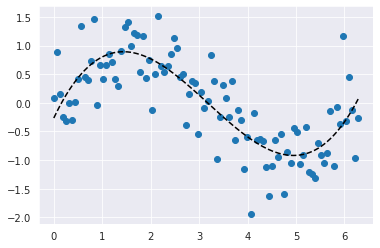

In [29]:
fit_and_plot_polynomial_model(df,LinearRegression(),3)

In [30]:
mean_model = np.mean(df.y)
print (mean_model)

-0.017254917297324934


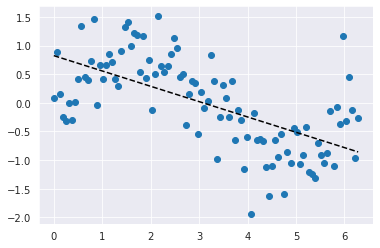

In [31]:
linear_model = fit_and_plot_model(df,LinearRegression())

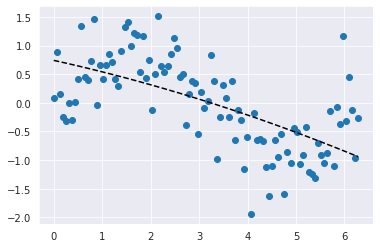

In [32]:
second_order_polynomial_model = fit_and_plot_polynomial_model(df,LinearRegression(),2)

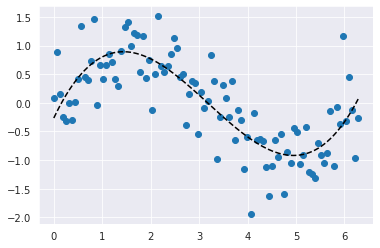

In [33]:
third_order_polynomial_model = fit_and_plot_polynomial_model(df,LinearRegression(),3)

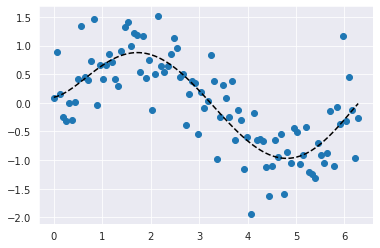

In [34]:
fifth_order_polynomial_model = fit_and_plot_polynomial_model(df,LinearRegression(),5)

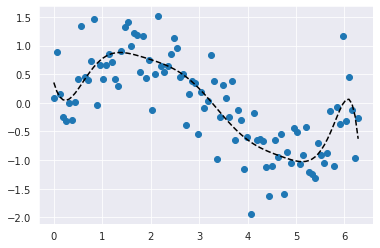

In [35]:
tenth_order_polynomial_model = fit_and_plot_polynomial_model(df, LinearRegression(), 10)

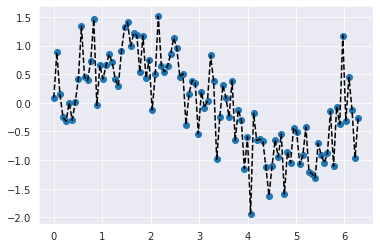

In [36]:
decision_tree_model = fit_and_plot_model(df,DecisionTreeRegressor())

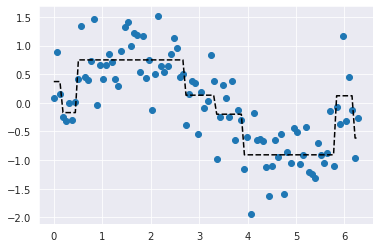

In [37]:
constrained_tree_by_depth = fit_and_plot_model(df, DecisionTreeRegressor(max_depth = 3))

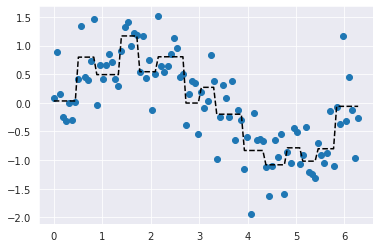

In [38]:
constrained_tree_by_leaf = fit_and_plot_model(df, DecisionTreeRegressor(min_samples_leaf = 5))

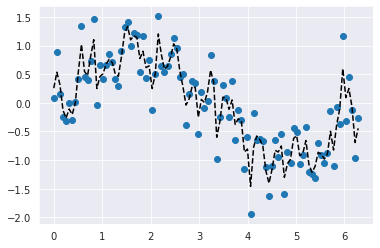

In [39]:
rf = fit_and_plot_model(df,RandomForestRegressor(random_state=123))

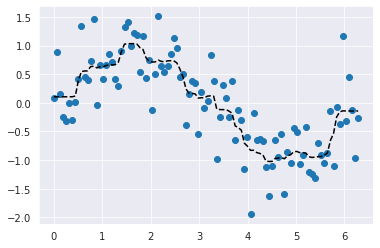

In [40]:
constrained_rf = fit_and_plot_model(df, RandomForestRegressor(min_samples_leaf=5, random_state=123))

## II. Unseen Data

In [42]:
x_test = np.linspace(0,2*np.pi,100)

np.random.seed(987)
noise_test = np.random.normal(0,0.5,100)

y_test = np.sin(x_test) + noise_test

In [43]:
test_df = pd.DataFrame({'x':x_test,'y':y_test})
test_df.head()

,x,y
0,0.000000,-0.842964
1,0.063467,-0.672136
2,0.126933,0.070692
3,0.190400,0.707436
4,0.253866,0.581668


## III. Performance Metrics

## IV. Model Evaluation & Selection

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

#### First, remember to import the relevant libraries and set the theme (if you haven't done so already).
* Remember to import the new performance metrics too.

#### Next, remember to copy over the helper functions (if you haven't done so already).
* <code>fit_and_plot_model()</code>
* <code>engineer_polynomial_features()</code>
* (the new) <code>fit_and_plot_polynomial_model()</code>

## <span style="color:RoyalBlue">Exercise 5.1 - Coding Section Checkpoint</span>

Before moving on, it's imperative that you've been following along the online Coding Section of this module. Those are core to each module and often contain **mission-critical code**, which means that the following modules REQUIRE you to have run that code.

#### A.) Import <code>'simulated_data.csv'</code> and display the first 5 observations.

<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x</th>
      <th>y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.000000</td>
      <td>0.086260</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.063467</td>
      <td>0.881165</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.126933</td>
      <td>0.145261</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.190400</td>
      <td>-0.252824</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.253866</td>
      <td>-0.320448</td>
    </tr>
  </tbody>
</table>

#### B.) Next, as a quick sanity check, create and display up to 3rd-order polynomial terms for the first 5 observations using your helper functions from this module.

<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x</th>
      <th>y</th>
      <th>x2</th>
      <th>x3</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.000000</td>
      <td>0.086260</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.063467</td>
      <td>0.881165</td>
      <td>0.004028</td>
      <td>0.000256</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.126933</td>
      <td>0.145261</td>
      <td>0.016112</td>
      <td>0.002045</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.190400</td>
      <td>-0.252824</td>
      <td>0.036252</td>
      <td>0.006902</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.253866</td>
      <td>-0.320448</td>
      <td>0.064448</td>
      <td>0.016361</td>
    </tr>
  </tbody>
</table>

## <span style="color:RoyalBlue">Exercise 5.2 - Models for Noisy Tangent Data</span>

Alright, let's jump right into the noisy tangent dataset we've been working on in the exercises. These next few exercises will allow you to replicate the entire analysis for the noisy tangent dataset and get practice evaluating your models.

#### A.) First, import <code>'simulated_tangent_data.csv'</code> and display the first 5 observations.

<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x</th>
      <th>y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.000000</td>
      <td>0.086260</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.063467</td>
      <td>0.881293</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.126933</td>
      <td>0.146287</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.190400</td>
      <td>-0.249341</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.253866</td>
      <td>-0.312132</td>
    </tr>
  </tbody>
</table>

#### B.) Next, you're going to fit and store all of the models. Fit them as normally and then simply store them in objects with unique names.

* Starting with our **mean model**...

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
-0.017254917297308325
</pre>

* Next, our **simple linear regression**... (Remember to set the y-axis limits to -5 and 5.)

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="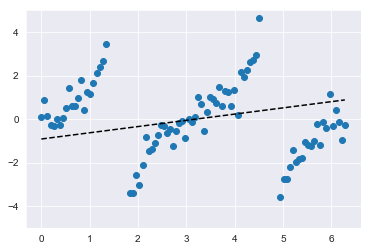&#10;">

* Followed by **2nd-order polynomial regression**...

* And **3rd-order polynomial regression**...

* And **5th-order polynomial regression**...

* And round out polynomial regressions with a **10th-order polynomial regression**...

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="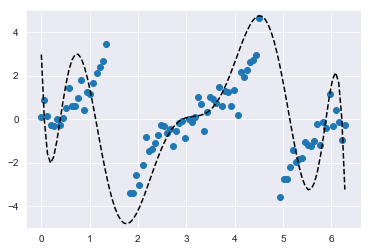&#10;">

* Next, we'll fit an **unconstrained decision tree**...

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="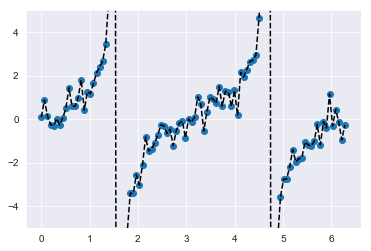&#10;">

* Then, a **decision tree with max depth 7**...

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="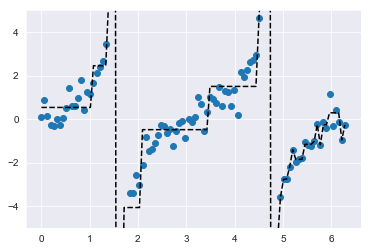&#10;">

* And a **decision tree with min leaf size 5**...

* Don't forget our default **unconstrained random forest** (remember the random state as well)...

* And finally, let's include a **random forest with min leaf size of 5** (remember the random state as well)...

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="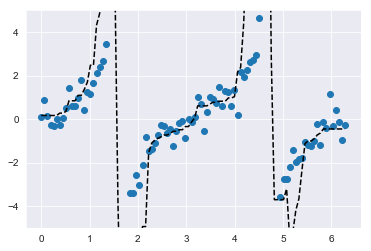&#10;">

## <span style="color:RoyalBlue">Exercise 5.3 - Unseen Noisy Tangent Data</span>

Great, let's proceed with our analysis by creating a new test set for the noisy tangent dataset. Again, we'll use the same simulation code, but we'll switch to a new random seed value.

#### A.) First, simulate a "test dataset" for our noisy tangent function using a random seed value of 987 (this is just another arbitrary number).

> $y = tan(x) + \epsilon$

In [ ]:
# input feature


# noise



# target variable


#### B.) Save it in another DataFrame named <code>test_tangent_df</code>. Display the first 5 observations.

<strong style="color:RoyalBlue">Expected output:</strong>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x</th>
      <th>y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.000000</td>
      <td>-0.842964</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.063467</td>
      <td>-0.672136</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.126933</td>
      <td>0.070692</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.190400</td>
      <td>0.707436</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.253866</td>
      <td>0.581668</td>
    </tr>
  </tbody>
</table>

#### C.) To confirm that this is indeed a new dataset, overlay this on top of the original noisy tangent dataset generated with random seed 321.
* Plot the original dataset in red and the new dataset in blue. Remember to set y-axis limits to -5 and 5.
* Notice how the new dataset follows the same underlying tangent pattern, but it's a completely new dataset (with different randomly generated noise).

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="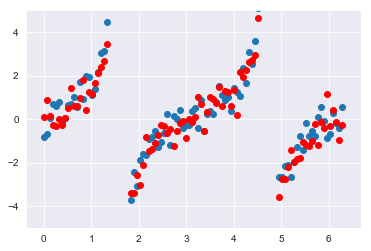&#10;">

#### D.) Finally, separate the input feature from the target variable for our test set.
* Name the features object <code>X_test</code> and the target variable object <code>y_test</code>. Going forward, we will adopt this naming convention as a shorthand for <code>features_test</code> and <code>target_test</code>. You'll see this more in the next project.

## <span style="color:RoyalBlue">Exercise 5.4 - Models vs. Noisy Tangent Data</span>

Alright, we're ready to evaluate our models on the noisy tangent dataset and pick a winner empirically.

#### A.) First, save predictions for each of your models on the tangent data test set.
* Pass in <code>X_test</code> that you separated out earlier.
* Remember: for the polynomial regression models, you'll need to first engineer the polynomial terms for the test set.

In [ ]:
# Predictions on test set from mean model



# Predictions on test set from simple linear regression



# Predictions on test set from 2nd-order polynomial model



# Predictions on test set from 3rd-order polynomial model



# Predictions on test set from 5th-order polynomial model



# Predictions on test set from 10th-order polynomial model



# Predictions on test set from unconstrained decision tree model



# Predictions on test set from constrained decision tree by depth



# Predictions on test set from constrained decision tree by leaf size



# Predictions on test set from random forest



# Predictions on test set from constrained random forest




#### B.) Next, display the test set MSE for each of your models.
* Remember to use <code>y_test</code> as the "actual" values.
* What do you notice?

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
Mean Squared Error:
94.932 (Mean Model)
94.651 (Linear Model)
94.651 (2nd-Order Model)
92.705 (3rd-Order Model)
90.427 (5th-Order Model)
88.454 (10th-Order Model)
0.492 (Decision Tree Model)
0.784 (Constrained Tree by Depth)
53.813 (Constrained Tree by Leaf)
21.29 (Unconstrained Random Forest)
72.638 (Constrained RF)
</pre>

Wow, these results are surprising to say the least. After all, in the previous module, didn't we surmise that the unconstrained random forest would be overfit to the training data, similar to how it performed in the noisy sine data? In this case, it seems like there's a pretty big disparity in the performance that we'd expect based on our visualizations vs. the performance shown in the metrics. What's going on?

#### C.) Well, before we dive into this issue, let's also calculate the MAE for each of our models just to make sure we're not seeing things.

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
Mean Absolute Error:
3.464 (Mean Model)
3.639 (Linear Model)
3.637 (2nd-Order Model)
3.656 (3rd-Order Model)
3.611 (5th-Order Model)
3.607 (10th-Order Model)
0.566 (Decision Tree Model)
0.698 (Constrained Tree by Depth)
2.662 (Constrained Tree by Leaf)
1.341 (Unconstrained Random Forest)
3.17 (Constrained RF)
</pre>

Nope, we're not seeing things. It really does appear that the unconstrained decision tree is performing much better than the other models based on these metrics. But it still doesn't add up. Let's look closer.

## <span style="color:RoyalBlue">Exercise 5.5 - Error Analysis and Black Swans</span>

One way to troubleshoot a model or understand what's going on behind confusing results is to perform an **error analysis.** During an error analysis, you will directly look at the prediction errors to determine what could be going on under the hood.

#### A.) First, manually calculate the absolute errors for your unconstrained decision tree model on the tangent test set. Display them all.

<strong style="color:RoyalBlue">Expected output:</strong>

<pre>
0     0.929223
1     1.553301
2     0.074568
3     0.960260
4     0.902116
5     0.752139
6     0.132661
7     0.013700
8     0.146266
9     0.750251
10    0.405207
11    0.012678
12    0.727311
13    0.883622
14    1.582516
15    0.688354
16    0.081591
17    0.262233
18    0.048941
19    0.628742
20    0.444899
21    1.002626
22    0.226575
23    0.468961
24    0.216295
25    1.090782
26    0.985502
27    0.179439
28    0.299807
29    0.316241
        ...   
70    0.626184
71    0.442801
72    0.326892
73    0.113045
74    1.287833
75    1.255481
76    0.008725
77    0.195340
78    0.940274
79    0.114381
80    0.621740
81    0.088902
82    1.277363
83    0.030557
84    0.556206
85    0.979839
86    0.374481
87    1.004745
88    0.447195
89    0.489141
90    0.550872
91    1.286776
92    0.678469
93    0.318755
94    2.027105
95    0.382149
96    0.177434
97    0.060749
98    0.550345
99    0.808894
Name: y, Length: 100, dtype: float64
</pre>

Alright, it looks like the decision tree model has a variety of error values, as we'd expect. This is good to know, but it's not very helpful to just look at all of these errors in this format. After all, what if we had 1000 observations? There's no way we could analyze each error individually.

#### B.) Instead, display summary statistics for those errors.
* Tip: When you take <code>np.abs(y_test - pred_tree)</code>, you end up with a Pandas Series object because <code>y_test</code> is a Pandas Series (we created it as <code>tanget_test_df.y</code>, remember?).
* Tip: Pandas Series have a <code>.describe()</code> method that displays the summary statistics.

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
count    100.000000
mean       0.566050
std        0.416513
min        0.008725
25%        0.224005
50%        0.519104
75%        0.811958
max        2.027105
Name: y, dtype: float64
</pre>

OK, now we're getting somewhere. We see that the average absolute error is 0.566, which is the same as we got earlier. We also see that the minimum is 0.008 and the maximum is 2.027. The 25th-percentile is at 0.224, the 50th-percentile (a.k.a. the median) is at 0.519, and the 75th-percentile is at 0.812.

#### C.) Next, display the summary statistics for the absolute errors from your unconstrained random forest model.
* Remember, if just based on the visualization, we would NOT have expected this to perform so much worse than the single decision tree.
* What do you notice about the summary statistics, especially in relation to the decision tree?

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
count    100.000000
mean       1.340700
std        4.437249
min        0.011340
25%        0.290459
50%        0.537447
75%        0.929536
max       39.912867
Name: y, dtype: float64
</pre>

Aha! As it turns out, the minimum, 25th-percentile, median, and 75th-percentile absolute errors are comparable (only slightly higher) than those for the decision tree model. However, the **maximum** error is much, much higher than that of the decision tree model.

Now that we see this information, if we turn around and think a bit more about the problem, it actually begins to make a lot of sense. If you remember from trigonometry, the tangent function is **asymptotic**. As $x$ approaches certain values at regular intervals, then $y$ actually approaches $\infty$ or $-\infty$.

Practically speaking, this means that we will end up with extremely large or extremely small values of $y$ that **appear as outliers** to many machine learning algorithms. Thus, a random forest, which "smoothes out" the predictions, could end up severely punished by predictions near those asymptotes.

Let's see what we mean:

#### D.) Fit and plot an unconstrained decision tree on the tangent dataset. Set the y-axis limits to -5 and 5.
* So far, we've been setting the y-axis limits to -5 and 5 so that we can better visualize the model. But this has actually led us to an important lesson!

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="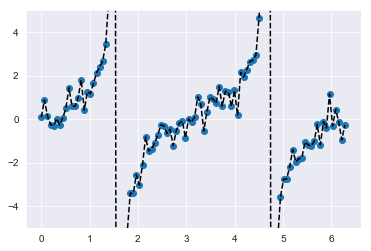&#10;">

As you can see, when we set the y-axis limits to be between -5 and 5, it appears that our decision has overfit the training data. And in a certain sense, it definitely still has. In fact, the visualization clearly shows that the tree has learned the noise from the training data.

However, sometimes that doesn't tell the full story.

#### E.) Fit and plot an unconstrained random forest on the tangent dataset. Again, set the y-axis limits to -5 and 5.
* We'll use random state of 123.

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="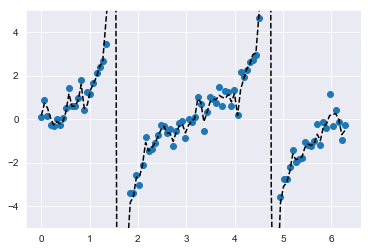&#10;">

As you can see, the random forest "smoothes out" the predictions, making us believe that it would be less overfit.

#### F.) Finally fit and plot the decision tree and random forest again. This time, however, do not change the y-axis limits. Allow them to stay their default values.

<strong style="color:RoyalBlue">Expected output (decision tree):</strong>
<img src="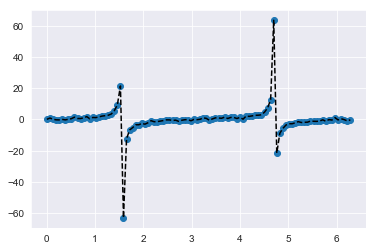&#10;">

<strong style="color:RoyalBlue">Expected output (random forest):</strong>
<img src="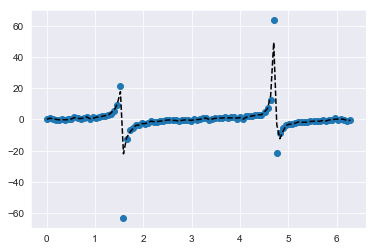&#10;">

#### Fascinating!
* Notice how in the random forest model, the model predictions (black dotted line) do not extend all the way down to the large negative $y$ values nor the large positive $y$ values while the model predictions for the decision tree do.

* As it turns out, because the tangent function is able to produce extremely large and small values of $y$, the tendency for the random forest to smoothe out the predictions ends up harshly punishing the model during those **"black swan"** (i.e. large outlier) events.

**So while the decision tree appeared to be overfit, its unconstrained flexibility actually allowed it to learn those extreme observations as well.**

Now, in the real world, it's never that simple. In this simulation, the "black swan" events happened on periodic, predictable intervals following the tangent function. In the real world, these types of events are often unpredictable, sudden, and/or unprecedented.